<a href="https://colab.research.google.com/github/drewoodward/gradebook/blob/main/msftprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import os
import json
import pandas as pd

DATA_PATH = "msft_data.json"

if os.path.exists(DATA_PATH):
  # Read from file if we've already downloaded the data.
  with open(DATA_PATH) as f:
    msft_hist = pd.read_json(DATA_PATH)
else:
  # Download data (requires a free yfinance API key)
  msft = yf.download("MSFT", period="max")
  msft_hist = msft

# Filter data for dates between 2010 and present day
start_date = pd.to_datetime("2000-01-01")
end_date = pd.Timestamp.today()
msft_hist = msft_hist.loc[(msft_hist.index >= start_date) & (msft_hist.index <= end_date)]

# No need to re-save the data to JSON since we're modifying the existing dataframe


[*********************100%%**********************]  1 of 1 completed


In [ ]:
msft_hist

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,58.687500,59.312500,56.000000,58.281250,36.065571,53228400
2000-01-04,56.781250,58.562500,56.125000,56.312500,34.847267,54119000
2000-01-05,55.562500,58.187500,54.687500,56.906250,35.214687,64059600
2000-01-06,56.093750,56.937500,54.187500,55.000000,34.035065,54976600
2000-01-07,54.312500,56.125000,53.656250,55.718750,34.479836,62013600
...,...,...,...,...,...,...
2024-05-08,408.170013,412.230011,406.709991,410.540009,410.540009,11792300
2024-05-09,410.570007,412.720001,409.100006,412.320007,412.320007,14689700
2024-05-10,412.940002,415.380005,411.799988,414.739990,414.739990,13402300


In [ ]:
# Display microsoft stock price history so we can look at the structure of the data
msft_hist.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,58.68750,59.3125,56.00000,58.28125,36.065571,53228400
2000-01-04,56.78125,58.5625,56.12500,56.31250,34.847267,54119000
2000-01-05,55.56250,58.1875,54.68750,56.90625,35.214687,64059600
2000-01-06,56.09375,56.9375,54.18750,55.00000,34.035065,54976600
2000-01-07,54.31250,56.1250,53.65625,55.71875,34.479836,62013600


<Axes: xlabel='Date'>

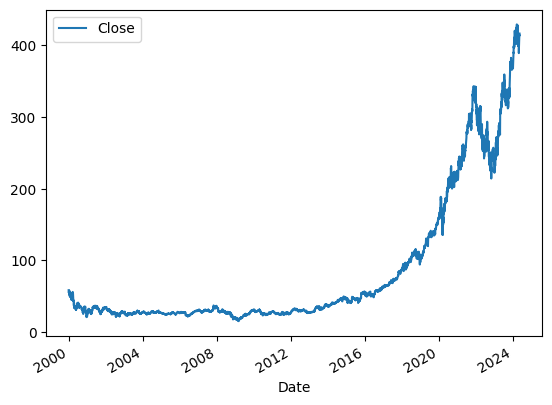

In [ ]:
# Visualize microsoft stock prices
msft_hist.plot.line(y="Close", use_index=True)

In [ ]:
#wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [ ]:
# Ensure we know the actual closing price
data = msft_hist[["Close"]]
data = data.rename(columns = {'Close':'Actual_Close'})

# Setup our target.  This identifies if the price went up or down
data["Target"] = msft_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

In [ ]:
msft

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060163,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062311,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063386,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061774,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060700,47894400
...,...,...,...,...,...,...
2024-05-08,408.170013,412.230011,406.709991,410.540009,410.540009,11792300
2024-05-09,410.570007,412.720001,409.100006,412.320007,412.320007,14689700
2024-05-10,412.940002,415.380005,411.799988,414.739990,414.739990,13402300


In [ ]:
# Shift stock prices forward one day, so we're predicting tomorrow's stock prices from today's prices.
msft_prev = msft_hist.copy()
msft_prev = msft_prev.shift(1)

In [ ]:
# Create our training data
predictors = ["Close", "Volume", "Open", "High", "Low"]
data = data.join(msft_prev[predictors]).iloc[1:]

In [ ]:
data.head(5)

,Actual_Close,Target,Close,Volume,Open,High,Low
Date,,,,,,,
2000-01-04,56.31250,0.0,58.28125,53228400.0,58.68750,59.3125,56.00000
2000-01-05,56.90625,1.0,56.31250,54119000.0,56.78125,58.5625,56.12500
2000-01-06,55.00000,0.0,56.90625,64059600.0,55.56250,58.1875,54.68750
2000-01-07,55.71875,1.0,55.00000,54976600.0,56.09375,56.9375,54.18750
2000-01-10,56.12500,1.0,55.71875,62013600.0,54.31250,56.1250,53.65625


In [ ]:
# Download historical interest rate data (replace 'FEDFUNDS' with the appropriate code)
interest_rates = yf.download("^FEDFUNDS", period="max")["Close"]

[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^FEDFUNDS']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [ ]:
#Use the most recent closing price
if not interest_rates.empty:
  current_rate = interest_rates.iloc[-1]
else:
  # Handle the case where there's no data (e.g., print a message or use a default value)
  print("No data available in interest_rates")

No data available in interest_rates


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create a random forest classification model.  Set min_samples_split high to ensure we don't overfit.
model = RandomForestClassifier(n_estimators=10000, min_samples_split=200, random_state=1)

# Create a train and test set
train = data.iloc[:-50]
test = data.iloc[-50:]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=200, n_estimators=10000,
                       random_state=1)

In [ ]:
from sklearn.metrics import precision_score

# Evaluate error of predictions
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.8333333333333334

<Axes: xlabel='Date'>

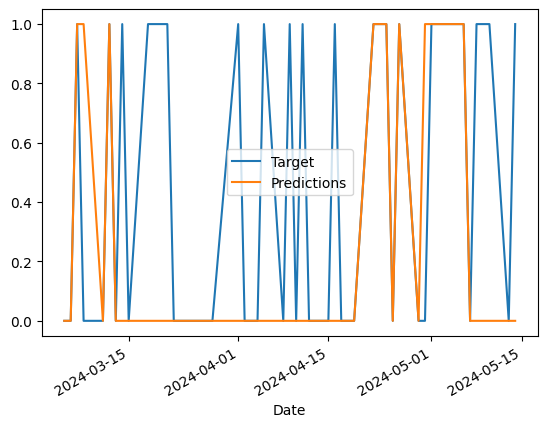

In [ ]:
combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
combined.plot()

In [ ]:
def backtest(data, model, predictors, start=1000, step=300):
    predictions = []
    # Loop over the dataset in increments
    for i in range(start, data.shape[0], step):
        # Split into train and test sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        # Fit the random forest model
        model.fit(train[predictors], train["Target"])

        # Make predictions
        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > .5] = 1
        preds[preds<=.5] = 0

        # Combine predictions and test values
        combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)

        predictions.append(combined)

    return pd.concat(predictions)

In [ ]:
predictions = backtest(data, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

Predictions
0.0    2939
1.0    2188
Name: count, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5178244972577697

In [ ]:
weekly_mean = data.rolling(7).mean()
quarterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(365).mean()
weekly_trend = data.shift(1).rolling(7).mean()["Target"]

In [ ]:
data["weekly_mean"] = weekly_mean["Close"] / data["Close"]
data["quarterly_mean"] = quarterly_mean["Close"] / data["Close"]
data["annual_mean"] = annual_mean["Close"] / data["Close"]

data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]
data["weekly_trend"] = weekly_trend

data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]

In [ ]:
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio", "low_close_ratio", "weekly_trend"]
predictions = backtest(data.iloc[365:], model, full_predictors)

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5326251896813353

In [ ]:
print(predictions)

            Target  Predictions
Date                           
2005-06-10     0.0          0.0
2005-06-13     0.0          0.0
2005-06-14     1.0          1.0
2005-06-15     0.0          0.0
2005-06-16     0.0          0.0
...            ...          ...
2024-05-06     1.0          0.0
2024-05-07     0.0          0.0
2024-05-08     1.0          0.0
2024-05-09     1.0          0.0
2024-05-10     1.0          0.0

[4762 rows x 2 columns]
